<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

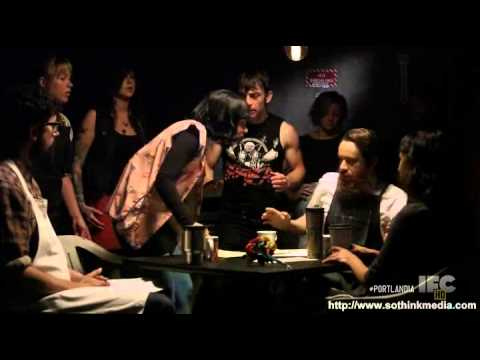

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [3]:
%pwd

'/Users/computer/projects/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [4]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [5]:
# Start here 
shops.shape

(7616, 3)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [6]:


# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")




In [7]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens
      


Try example to test function

In [8]:
sample = "Try tokenize this string"

tokenize(sample)

['try', 'tokenize', 'this', 'string']

In [9]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [10]:
shops['full_review_text'].value_counts(normalize=True)

 10/10/2016 This place is so cute. New favorite coffee spot on Burnet/in Northcross. Almost wish I was still in grad school,  so I would have an excuse to be there everyday.  Amazing coffee and best chicken & waffles ever! The chicken was seasoned perfectly and made for a delicious savory brunch (with the house made slaw they give you on the side). The olive oil cake was also awesome, light and sweet. Perfect coffee companion. My husband and I will definitely be back, as we loved everything and felt it was all very reasonable priced. Olive oil cake, chicken & waffle and 15-minutes-of-fame coffee! So good.                                                                                                                                                                                                                                                                                                                                                                                                    

In [11]:
shops['tokens']= shops['full_review_text'].apply(tokenize)

In [12]:
shops['tokens'].head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: tokens, dtype: object

In [13]:
shops['tokens'].value_counts(normalize=True)

[1192016, 1, checkin, listed, in, in, search, of, fantastic, coffee, so, i, really, didnt, want, to, write, this, review, i, didnt, want, to, tell, anyone, how, awesome, the, factory, cafe, with, a, soul, is, because, i, dont, want, it, overrun, and, super, busy, with, no, place, to, sit, like, so, many, other, decent, coffee, shops, in, austin, i, happened, to, come, in, here, with, a, friend, midweek, and, we, sat, here, for, several, hours, enjoying, the, peace, and, quiet, the, atmosphere, and, the, awesome, coffee, this, place, is, a, little, eclectic, lots, of, peculiar, art, books, games, knickknacks, and, an, ...]                                 0.000525
[10252016, tried, this, new, cafe, spot, on, burnet, with, a, friend, unassuming, storefront, the, decor, is, quaint, af, and, you, have, to, order, from, ipads, at, the, counter, and, then, choose, a, place, to, sit, not, a, brunch, spot, as, we, had, thought, just, a, cafe, with, a, couple, of, food, options, the, nutella, wa

In [14]:
shops[['full_review_text', 'tokens']][:10]

,full_review_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,"[11252016, 1, checkin, love, love, loved, the,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...","[1222016, listed, in, date, night, austin, amb..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,"[11252016, very, cool, decor, good, drinks, ni..."
4,12/3/2016 1 check-in They are located within ...,"[1232016, 1, checkin, they, are, located, with..."
5,11/20/2016 1 check-in Very cute cafe! I think...,"[11202016, 1, checkin, very, cute, cafe, i, th..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...","[10272016, 2, checkins, listed, in, nuptial, c..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,"[1122016, 2, checkins, love, this, place, 5, s..."
8,"10/25/2016 1 check-in Ok, let's try this appr...","[10252016, 1, checkin, ok, lets, try, this, ap..."
9,11/10/2016 3 check-ins This place has been sh...,"[11102016, 3, checkins, this, place, has, been..."


In [15]:
'''Word/Token count'''
#import counter
from collections import Counter

word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))
#10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [18]:
shops['tokens']

0       [11252016, 1, checkin, love, love, loved, the,...
1       [1222016, listed, in, date, night, austin, amb...
2       [11302016, 1, checkin, listed, in, brunch, spo...
3       [11252016, very, cool, decor, good, drinks, ni...
4       [1232016, 1, checkin, they, are, located, with...
                              ...                        
7611    [2192015, i, actually, step, into, this, resta...
7612    [1212016, ok, the, steeping, room, is, awesome...
7613    [4302015, loved, coming, here, for, tea, and, ...
7614    [822015, the, food, is, just, average, the, bo...
7615    [5232015, i, finally, stopped, in, for, lunch,...
Name: tokens, Length: 7616, dtype: object

In [20]:
# Function that returns df of word counts
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [21]:

wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,the,6847,34809,1.0,0.044537,0.044537,0.899028
56,and,6864,26650,2.0,0.034098,0.078635,0.901261
22,a,6246,22755,3.0,0.029114,0.107749,0.820116
6,i,5528,20237,4.0,0.025893,0.133642,0.725840
36,to,5653,17164,5.0,0.021961,0.155602,0.742253


In [22]:
#Filtering the dataframe to the good and bad coffee shops

good_shop = shops[(shops['star_rating'] == ' 5.0 star rating ') | (shops['star_rating'] == ' 4.0 star rating ')]
bad_shop = shops[(shops['star_rating'] == ' 1.0 star rating ') | (shops['star_rating'] == ' 2.0 star rating ') | (shops['star_rating'] == ' 3.0 star rating ')]

In [23]:
good_shop['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
Name: star_rating, dtype: int64

In [24]:
bad_shop['star_rating'].value_counts()

 3.0 star rating     738
 2.0 star rating     460
 1.0 star rating     278
Name: star_rating, dtype: int64

In [25]:

nlp = spacy.load("en_core_web_lg")

# Instantiate tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [26]:

# Additional stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['like','good','pretty','great','coffee','place','definitely','austin',' ', "don't", '1',"little",'-','I','check-in', 'i', "I'm","i'm","i've", "it", "it's", 'it.', 'the', 'this',])

In [27]:
# taking out stop words
tokens = []

for doc in tokenizer.pipe(good_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good_shop['tokens'] = tokens

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:

wc_good = count(good_shop['tokens'])
wc_good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
20,love,1263,1604,1.0,0.005698,0.005698,0.205700
245,nice,962,1101,2.0,0.003911,0.009610,0.156678
439,best,951,1093,3.0,0.003883,0.013493,0.154886
163,friendly,986,1014,4.0,0.003602,0.017095,0.160586
380,food,826,994,5.0,0.003531,0.020627,0.134528
470,time,835,994,6.0,0.003531,0.024158,0.135993
38,latte,713,949,7.0,0.003371,0.027529,0.116124
23,got,743,947,8.0,0.003364,0.030894,0.121010
303,check-ins,929,930,9.0,0.003304,0.034198,0.151303
37,shop,775,910,10.0,0.003233,0.037431,0.126221


In [29]:

# Additional stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['like','good','pretty','great','coffee','place','definitely','austin',' ', "don't", '1',"little",'-','I','check-in', 'i', "I'm","i'm","i've", "it", "it's", 'it.', 'the', 'this',])

In [30]:
# taking out stop words
tokens = []

for doc in tokenizer.pipe(bad_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad_shop['tokens'] = tokens

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:

wc_bad = count(bad_shop['tokens'])
wc_bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
101,food,266,369,1.0,0.004578,0.004578,0.180217
245,time,264,351,2.0,0.004354,0.008932,0.178862
532,people,247,327,3.0,0.004057,0.012988,0.167344
4,service,261,314,4.0,0.003895,0.016884,0.176829
24,got,237,300,5.0,0.003722,0.020605,0.160569
353,ordered,240,296,6.0,0.003672,0.024277,0.162602
461,didn't,222,292,7.0,0.003622,0.027899,0.150407
114,come,234,285,8.0,0.003535,0.031435,0.158537
34,nice,226,267,9.0,0.003312,0.034747,0.153117
380,order,174,253,10.0,0.003139,0.037886,0.117886


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


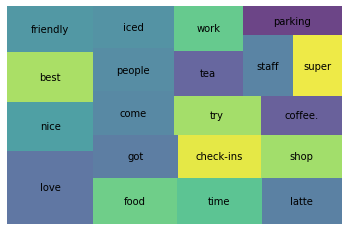

In [32]:
# Good words
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

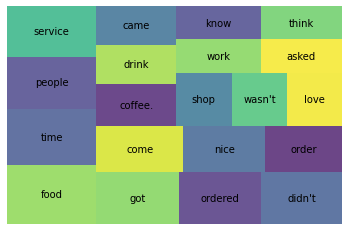

In [33]:
#Bad words
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

